In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import the module for ListedColormap
import numpy as np

In [1]:
def visualize_missing_data(data, variable_name):
    # Create a DataFrame containing only the selected variable
    variable_df = pd.DataFrame(data[variable_name])

    # Create a binary DataFrame indicating missing values
    missing_df = variable_df.isnull().astype(int)

    # Create a colormap
    cmap = plt.cm.get_cmap('Blues')

    # Plot the missing data graph
    plt.figure(figsize=(10, 4))
    plt.imshow(missing_df.values, cmap=cmap, aspect='auto')

    # Customize the plot
    plt.xticks(np.arange(0, 1, 1), variable_df.columns)
    plt.yticks([])  # No y-axis ticks
    plt.title(f'Missing Data Visualization for {variable_name}')
    plt.xlabel('Variable')
    plt.ylabel('Data Points')

    # Add color bar legend
    cbar = plt.colorbar()
    cbar.set_label('Missing Data', rotation=270, labelpad=15)

    plt.show()




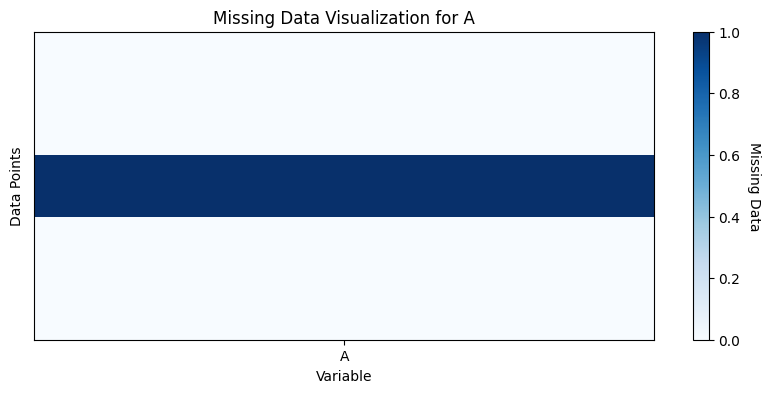

In [4]:
# Example usage
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, np.nan]
})

visualize_missing_data(data, 'A')

In [6]:
def visualize_custom_value(data, variable_name, colored_value):
    # Create a DataFrame containing only the selected variable
    variable_df = pd.DataFrame(data[variable_name])

    # Create a binary DataFrame indicating presence of the colored value
    colored_df = variable_df == colored_value

    # Plot the colored value graph
    plt.figure(figsize=(10, 4))
    plt.imshow(colored_df.values, cmap='binary', aspect='auto')

    # Customize the plot
    plt.xticks(np.arange(0, 1, 1), variable_df.columns)
    plt.yticks([])  # No y-axis ticks
    plt.title(f'Visualization for {variable_name} with Value {colored_value}')
    plt.xlabel('Variable')
    plt.ylabel('Data Points')

    plt.show()

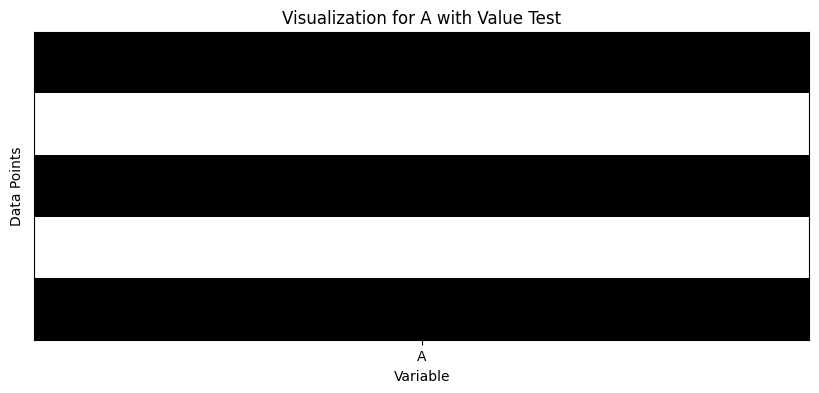

In [7]:
# Example usage
data = pd.DataFrame({
    'A': ['Test', 'Other', 'Test', 'Another', 'Test'],
    'B': ['Other', 'Test', 'Test', 'Another', 'Other']
})

visualize_custom_value(data, 'A', 'Test')

In [11]:
def visualize_custom_value_inverted(data, variable_name, colored_value):
    # Create a DataFrame containing only the selected variable
    variable_df = pd.DataFrame(data[variable_name])

    # Create a binary DataFrame indicating presence of the colored value
    colored_df = variable_df == colored_value

    # Plot the colored value graph with inverted orientation
    plt.figure(figsize=(10, 4))  # Adjust the figsize for the inverted orientation
    plt.imshow(colored_df.values.T, cmap='binary', aspect='auto', origin='upper')  # Transpose the matrix

    # Customize the plot
    plt.xticks([])  # No x-axis ticks
    plt.yticks(np.arange(0, 1, 1), variable_df.columns[::-1])  # Reverse the y-axis labels
    plt.title(f'Visualization for {variable_name} with Value {colored_value}')
    plt.xlabel('Data Points')
    plt.ylabel('Variable')

    plt.show()

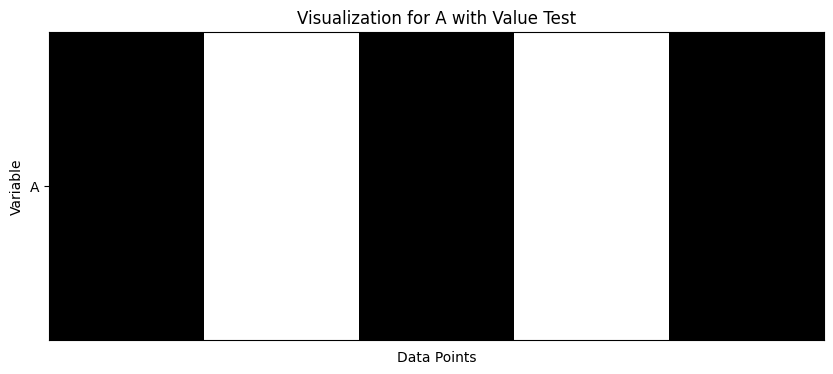

In [12]:
# Example usage
data = pd.DataFrame({
    'A': ['Test', 'Other', 'Test', 'Another', 'Test'],
    'B': ['Other', 'Test', 'Test', 'Another', 'Other']
})

visualize_custom_value_inverted(data, 'A', 'Test')

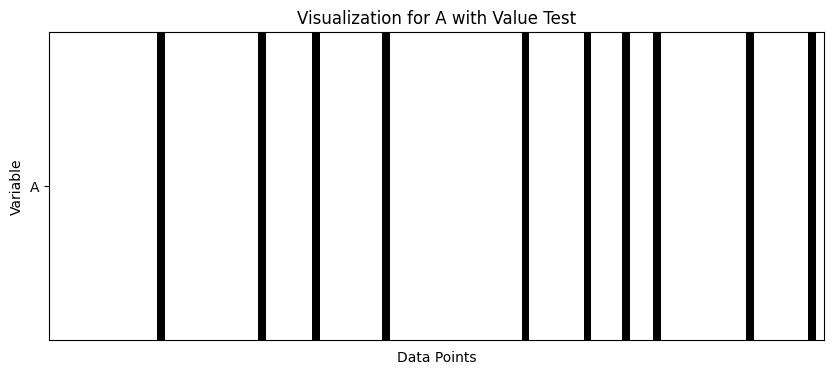

In [13]:
# Example usage with 100 observations
np.random.seed(42)  # Set seed for reproducibility

n_observations = 100
values = np.array(["Train"] * 90 + ["Test"] * 10)
np.random.shuffle(values)

data = pd.DataFrame({'A': values})

visualize_custom_value_inverted(data, 'A', 'Test')

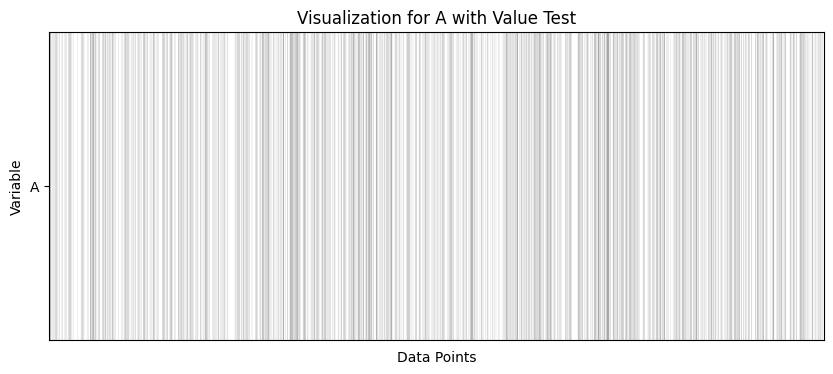

In [14]:
# Example usage with 10000 observations
np.random.seed(42)  # Set seed for reproducibility

n_observations = 10000
values = np.array(["Train"] * 9000 + ["Test"] * 1000)
np.random.shuffle(values)

data = pd.DataFrame({'A': values})

visualize_custom_value_inverted(data, 'A', 'Test')

In [25]:
def visualize_custom_value_inverted(data, variable_name, colored_value, color_present='black', color_absent='white'):
    # Create a DataFrame containing only the selected variable
    variable_df = pd.DataFrame(data[variable_name])

    # Create a binary DataFrame indicating presence of the colored value
    colored_df = variable_df == colored_value

    # Create a custom colormap
    custom_cmap = mcolors.ListedColormap([color_absent, color_present])

    # Plot the colored value graph with inverted orientation
    plt.figure(figsize=(10, 4))  # Adjust the figsize for the inverted orientation
    plt.imshow(colored_df.values.T, cmap=custom_cmap, aspect='auto', origin='upper')  # Transpose the matrix

    # Customize the plot
    plt.xticks([])  # No x-axis ticks
    plt.yticks(np.arange(0, 1, 1), variable_df.columns[::-1])  # Reverse the y-axis labels
    plt.title(f'Visualization for {variable_name} with Value {colored_value}')
    plt.xlabel('Data Points')
    plt.ylabel('Variable')

    plt.show()

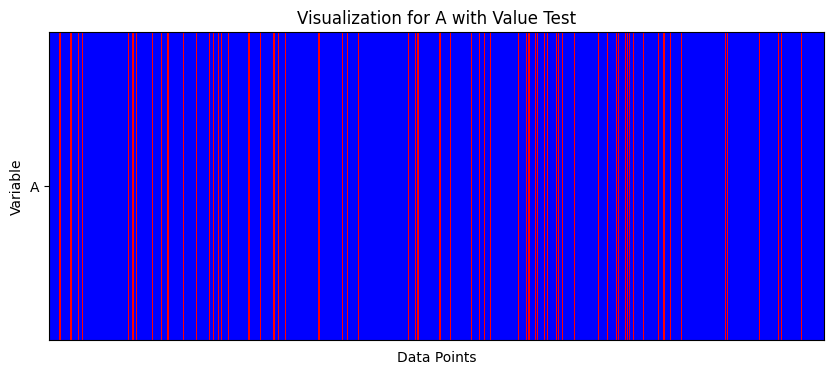

In [34]:
# Example usage with custom colors
np.random.seed(42)  # Set seed for reproducibility

n_observations = 1000
values = np.array(["Train"] * 900 + ["Test"] * 100)
np.random.shuffle(values)

data = pd.DataFrame({'A': values})

visualize_custom_value_inverted(data, 'A', 'Test', color_present='red', color_absent='blue')

In [35]:
def visualize_custom_value_inverted(data, variable_name, colored_value, color_present='black', color_absent='white', color_other='red'):
    # Create a DataFrame containing only the selected variable
    variable_df = pd.DataFrame(data[variable_name])

    # Create binary DataFrames indicating presence of the colored values
    colored_present_df = variable_df == colored_value
    colored_other_df = ~colored_present_df & ~variable_df.isnull()

    # Create a custom colormap
    custom_cmap = mcolors.ListedColormap([color_absent, color_present, color_other])

    # Combine the DataFrames
    combined_df = pd.concat([colored_present_df, colored_other_df], axis=1)

    # Plot the colored value graph with inverted orientation
    plt.figure(figsize=(10, 4))  # Modify figsize as 10, 4
    plt.imshow(combined_df.values.T, cmap=custom_cmap, aspect='auto', origin='upper')  # Transpose the matrix

    # Customize the plot
    plt.xticks([])  # No x-axis ticks
    plt.yticks(np.arange(0, 1, 1), variable_df.columns[::-1])  # Reverse the y-axis labels
    plt.title(f'Visualization for {variable_name} with Value {colored_value}')
    plt.xlabel('Data Points')
    plt.ylabel('Variable')

    plt.show()



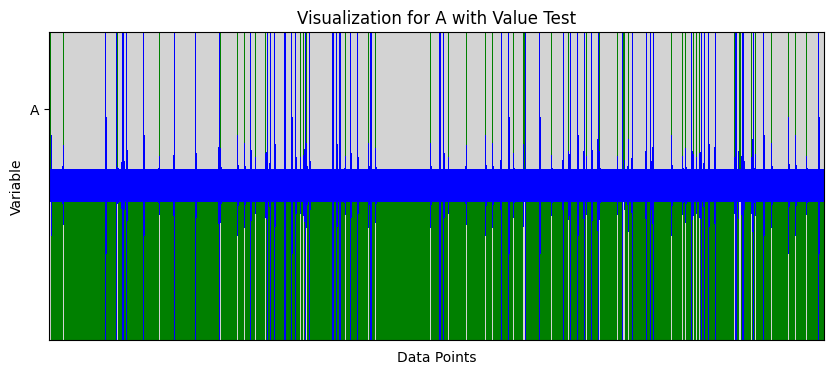

In [36]:
# Example usage with custom colors and modified parameters
np.random.seed(42)  # Set seed for reproducibility

n_observations = 1000  # Use 1000 observations
values = np.array(["Train"] * 700 + ["Test"] * 100 + ["Other"] * 200)  # Adjust the values and ratio
np.random.shuffle(values)

data = pd.DataFrame({'A': values})

visualize_custom_value_inverted(data, 'A', 'Test', color_present='blue', color_absent='lightgrey', color_other='green')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_custom_value_inverted(data, variable_name, colored_value, height_variable=None, color_present='black', color_absent='white'):
    # Create a DataFrame containing the selected variable and height variable if provided
    if height_variable:
        variable_df = pd.DataFrame(data[[variable_name, height_variable]])
    else:
        variable_df = pd.DataFrame(data[variable_name])

    # Create a binary DataFrame indicating presence of the colored value
    colored_df = variable_df[variable_name] == colored_value

    # Create a custom colormap
    custom_cmap = mcolors.ListedColormap([color_absent, color_present])

    # Plot the colored value graph with inverted orientation
    plt.figure(figsize=(10, 4))  # Adjust the figsize for the inverted orientation
    
    # If height_variable is provided, use it; otherwise, use an array of ones
    heights = variable_df[height_variable] if height_variable else np.ones(len(variable_df))
    
    # Transpose the matrix
    plt.imshow([heights], cmap=custom_cmap, aspect='auto', origin='upper')

    # Customize the plot
    plt.xticks([])  # No x-axis ticks
    plt.yticks(np.arange(0, 1, 1), [variable_name])
    plt.title(f'Visualization for {variable_name} with Value {colored_value}')
    plt.xlabel('Data Points')
    plt.ylabel('Variable')

    plt.show()




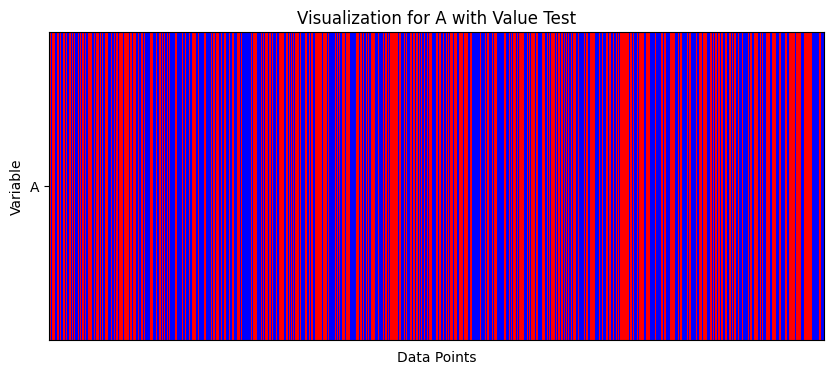

In [4]:
# Example usage with custom colors and height variable
np.random.seed(42)  # Set seed for reproducibility

n_observations = 1000
values = np.array(["Train"] * 900 + ["Test"] * 100)
np.random.shuffle(values)
heights = np.random.rand(n_observations)  # Numeric heights

data = pd.DataFrame({'A': values, 'Height': heights})

visualize_custom_value_inverted(data, 'A', 'Test', 'Height', color_present='red', color_absent='blue')

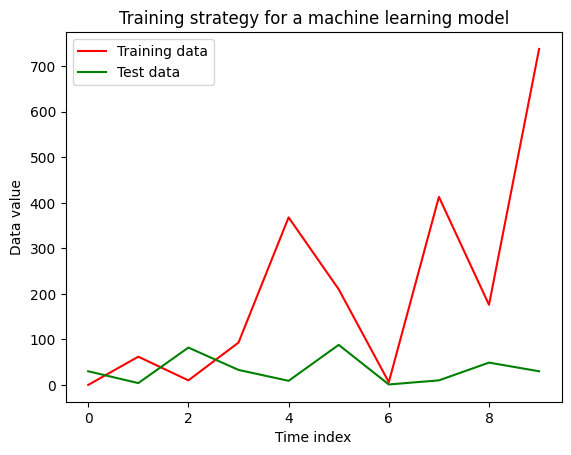

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create the data
x = np.arange(0, 10)
train_data = np.random.randint(0, 100, (10,)) * x
test_data = np.random.randint(0, 100, (10,))

# Plot the data
plt.plot(x, train_data, 'r', label='Training data')
plt.plot(x, test_data, 'g', label='Test data')

# Add a legend
plt.legend()

# Add a title
plt.title('Training strategy for a machine learning model')

# Add labels to the axes
plt.xlabel('Time index')
plt.ylabel('Data value')

# Show the plot
plt.show()

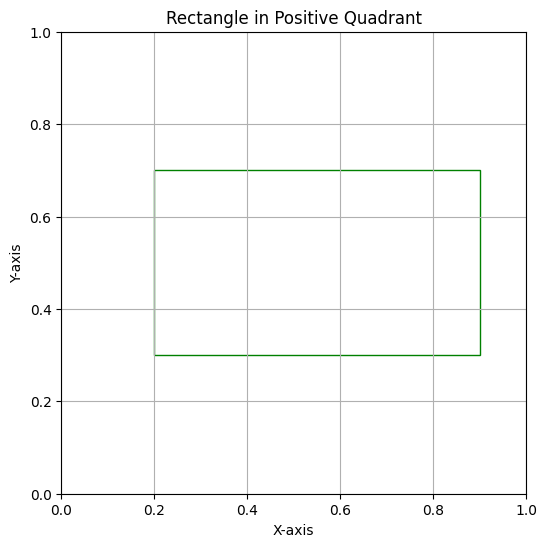

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_rectangle(width, height, x_position=0, y_position=0, color='blue'):
    """
    Display a rectangle on the positive quadrant of the graph.

    Parameters:
    width (float): Width of the rectangle.
    height (float): Height of the rectangle.
    x_position (float): X-coordinate of the bottom-left corner of the rectangle. Default is 0.
    y_position (float): Y-coordinate of the bottom-left corner of the rectangle. Default is 0.
    color (str): Color of the rectangle. Default is 'blue'.
    """
    plt.figure(figsize=(6, 6))  # Adjust the figsize as needed
    ax = plt.gca()

    rectangle = patches.Rectangle(
        (x_position, y_position), width, height,
        linewidth=1, edgecolor=color, facecolor='none'
    )

    ax.add_patch(rectangle)

    # Set limits to show only the positive quadrant
    plt.xlim(0, max(x_position + width, 1))
    plt.ylim(0, max(y_position + height, 1))

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Rectangle in Positive Quadrant')
    plt.grid(True)

    plt.show()

# Example usage
display_rectangle(width=0.7, height=0.4, x_position=0.2, y_position=0.3, color='green')


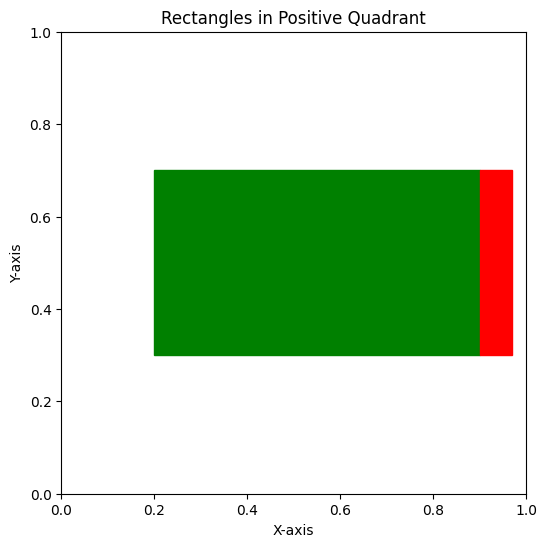

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_rectangles(width, height, x_position=0, y_position=0):
    """
    Display rectangles on the positive quadrant of the graph.

    Parameters:
    width (float): Width of the main rectangle.
    height (float): Height of the rectangles.
    x_position (float): X-coordinate of the bottom-left corner of the main rectangle. Default is 0.
    y_position (float): Y-coordinate of the bottom-left corner of the main rectangle. Default is 0.
    """
    plt.figure(figsize=(6, 6))  # Adjust the figsize as needed
    ax = plt.gca()

    # Main rectangle with green contour and fill
    main_rectangle = patches.Rectangle(
        (x_position, y_position), width, height,
        linewidth=1, edgecolor='green', facecolor='green'
    )
    ax.add_patch(main_rectangle)

    # Small rectangle to the right with red contour and fill
    small_rectangle_width = width * 0.1
    small_rectangle = patches.Rectangle(
        (x_position + width, y_position), small_rectangle_width, height,
        linewidth=1, edgecolor='red', facecolor='red'
    )
    ax.add_patch(small_rectangle)

    # Set limits to show both rectangles
    plt.xlim(0, max(x_position + width + small_rectangle_width, 1))
    plt.ylim(0, max(y_position + height, 1))

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Rectangles in Positive Quadrant')
    
    plt.grid(False)  # Hide grid lines
    
    plt.show()

# Example usage
display_rectangles(width=0.7, height=0.4, x_position=0.2, y_position=0.3)


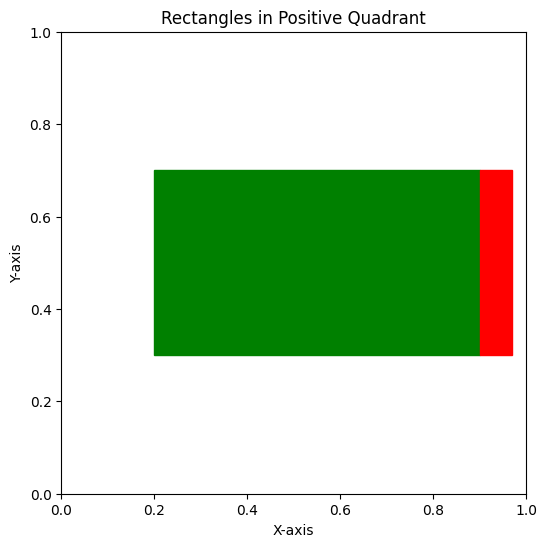

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_rectangle(width, height, x_position=0, y_position=0, color='blue'):
    """
    Display a rectangle on the positive quadrant of the graph.

    Parameters:
    width (float): Width of the rectangle.
    height (float): Height of the rectangle.
    x_position (float): X-coordinate of the bottom-left corner of the rectangle. Default is 0.
    y_position (float): Y-coordinate of the bottom-left corner of the rectangle. Default is 0.
    color (str): Color of the rectangle. Default is 'blue'.
    """
    ax = plt.gca()

    rectangle = patches.Rectangle(
        (x_position, y_position), width, height,
        linewidth=1, edgecolor=color, facecolor=color  # Both contour and fill are the same color
    )

    ax.add_patch(rectangle)

def main():
    plt.figure(figsize=(6, 6))  # Adjust the figsize as needed
    
    # First rectangle: Green contour and fill, and the small rectangle to its right
    display_rectangle(width=0.7, height=0.4, x_position=0.2, y_position=0.3, color='green')
    display_rectangle(width=0.07, height=0.4, x_position=0.9, y_position=0.3, color='red')

    # Set limits to show both rectangles
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Rectangles in Positive Quadrant')
    
    plt.grid(False)  # Hide grid lines
    
    plt.show()

# Call the main function
main()


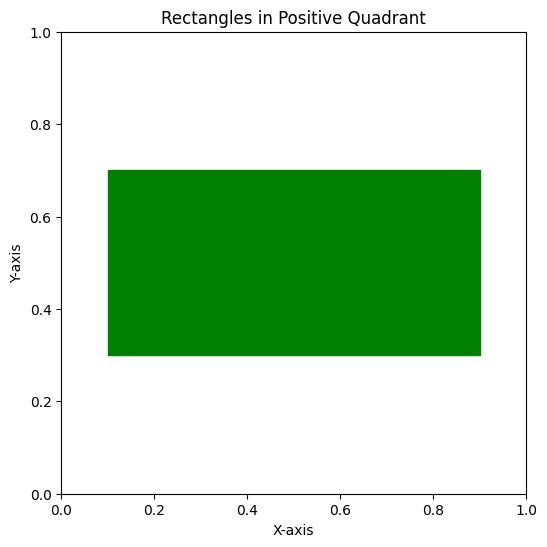

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_rectangle(width, height, x_position=0, y_position=0, color='blue'):
    """
    Display a rectangle on the positive quadrant of the graph.

    Parameters:
    width (float): Width of the rectangle.
    height (float): Height of the rectangle.
    x_position (float): X-coordinate of the bottom-left corner of the rectangle. Default is 0.
    y_position (float): Y-coordinate of the bottom-left corner of the rectangle. Default is 0.
    color (str): Color of the rectangle. Default is 'blue'.
    """
    ax = plt.gca()

    rectangle = patches.Rectangle(
        (x_position, y_position), width, height,
        linewidth=1, edgecolor=color, facecolor=color  # Both contour and fill are the same color
    )

    ax.add_patch(rectangle)

def main():
    plt.figure(figsize=(6, 6))  # Adjust the figsize as needed
    
    # First rectangle: Green contour and fill, and the small rectangle to its right
    display_rectangle(width=0.8, height=0.4, x_position=0.1, y_position=0.3, color='green')

    # Set limits to show both rectangles
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Rectangles in Positive Quadrant')
    
    plt.grid(False)  # Hide grid lines
    
    plt.show()

# Call the main function
main()


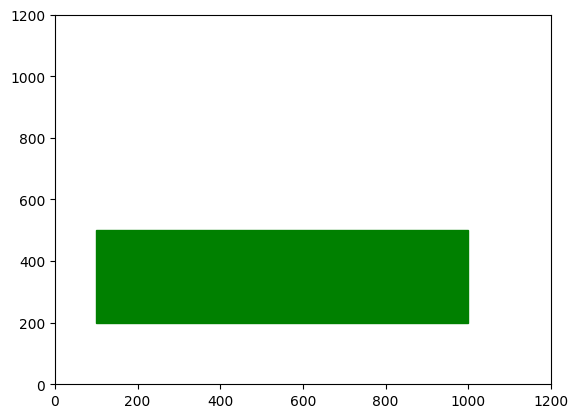

In [28]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_rectangle(width, height, x_position=0, y_position=0, color='blue'):
    """
    Display a rectangle on the positive quadrant of the graph.

    Parameters:
    width (float): Width of the rectangle.
    height (float): Height of the rectangle.
    x_position (float): X-coordinate of the bottom-left corner of the rectangle. Default is 0.
    y_position (float): Y-coordinate of the bottom-left corner of the rectangle. Default is 0.
    color (str): Color of the rectangle. Default is 'blue'.
    """
    ax = plt.gca()

    rectangle = patches.Rectangle(
        (x_position, y_position), width, height,
        linewidth=1, edgecolor=color, facecolor=color  # Both contour and fill are the same color
    )

    ax.add_patch(rectangle)

# Create a figure and axis
fig, ax = plt.subplots()

# Call the display_rectangle function to create a rectangle
display_rectangle(width=900, height=300, x_position=100, y_position=200, color='green')

# Set axis limits
ax.set_xlim(0, 1200)
ax.set_ylim(0, 1200)

# Display the plot
plt.show()


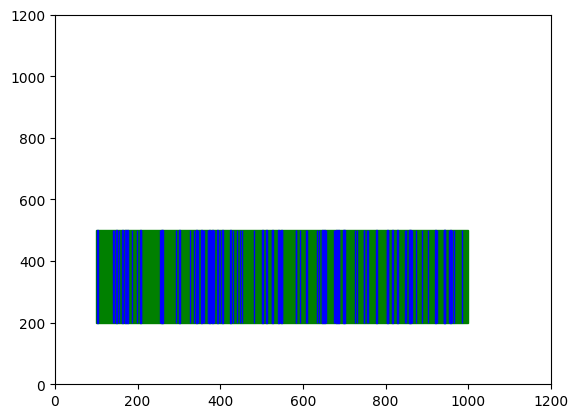

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def display_rectangle(width, height, x_position=0, y_position=0, color='blue'):
    """
    Display a rectangle on the positive quadrant of the graph.

    Parameters:
    width (float): Width of the rectangle.
    height (float): Height of the rectangle.
    x_position (float): X-coordinate of the bottom-left corner of the rectangle. Default is 0.
    y_position (float): Y-coordinate of the bottom-left corner of the rectangle. Default is 0.
    color (str): Color of the rectangle. Default is 'blue'.
    """
    ax = plt.gca()

    rectangle = patches.Rectangle(
        (x_position, y_position), width, height,
        linewidth=1, edgecolor=color, facecolor=color  # Both contour and fill are the same color
    )

    ax.add_patch(rectangle)

# Create a figure and axis
fig, ax = plt.subplots()

# Call the display_rectangle function to create the green rectangle
display_rectangle(width=900, height=300, x_position=100, y_position=200, color='green')

# Set axis limits
ax.set_xlim(0, 1200)
ax.set_ylim(0, 1200)

# Number of rectangles to add
num_rectangles = 100

# Generate and plot additional rectangles
for _ in range(num_rectangles):
    x_random = random.uniform(100, 100 + 900)  # Generate random x_position within the range of the green rectangle
    display_rectangle(width=1, height=300, x_position=x_random, y_position=200, color='blue')

# Display the plot
plt.show()


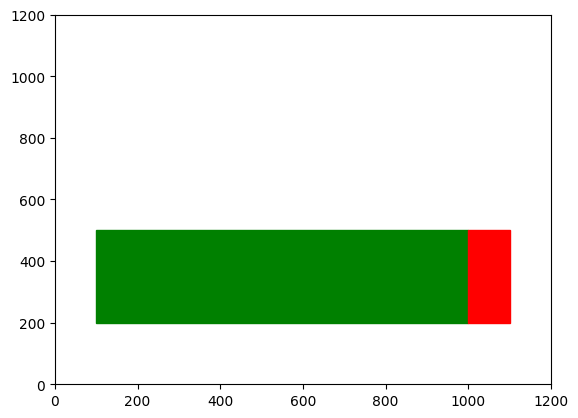

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def display_rectangle(width, height, x_position=0, y_position=0, color='blue'):
    """
    Display a rectangle on the positive quadrant of the graph.

    Parameters:
    width (float): Width of the rectangle.
    height (float): Height of the rectangle.
    x_position (float): X-coordinate of the bottom-left corner of the rectangle. Default is 0.
    y_position (float): Y-coordinate of the bottom-left corner of the rectangle. Default is 0.
    color (str): Color of the rectangle. Default is 'blue'.
    """
    ax = plt.gca()

    rectangle = patches.Rectangle(
        (x_position, y_position), width, height,
        linewidth=1, edgecolor=color, facecolor=color  # Both contour and fill are the same color
    )

    ax.add_patch(rectangle)

# Create a figure and axis
fig, ax = plt.subplots()

# Call the display_rectangle function to create the green rectangle
display_rectangle(width=900, height=300, x_position=100, y_position=200, color='green')
display_rectangle(width=100, height=300, x_position=1000, y_position=200, color='red')

# Set axis limits
ax.set_xlim(0, 1200)
ax.set_ylim(0, 1200)

# Display the plot
plt.show()


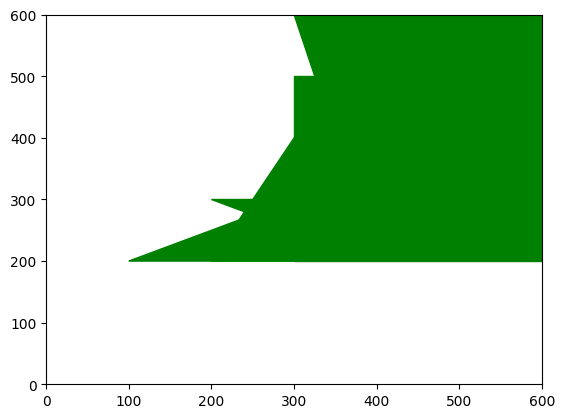

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def display_trapezium(base_width, top_width, x_position=0, y_position=0, color='blue'):
    """
    Display a trapezium on the positive quadrant of the graph.

    Parameters:
    base_width (float): Width of the trapezium at the bottom.
    top_width (float): Width of the trapezium at the top.
    x_position (float): X-coordinate of the bottom-left corner of the trapezium. Default is 0.
    y_position (float): Y-coordinate of the bottom-left corner of the trapezium. Default is 0.
    color (str): Color of the trapezium. Default is 'blue'.
    """
    ax = plt.gca()

    trapezium = patches.Polygon(
        [(x_position, y_position), (x_position + base_width, y_position),
         (x_position + top_width, y_position + top_width),
         (x_position + (base_width - top_width), y_position + top_width)],
        closed=True, linewidth=1, edgecolor=color, facecolor=color  # Both contour and fill are the same color
    )

    ax.add_patch(trapezium)

# Create a figure and axis
fig, ax = plt.subplots()

# Call the display_trapezium function to create a trapezium
x_positions = [100, 200, 300, 400]  # You can modify this list as needed
base_width = 300
for x in x_positions:
    display_trapezium(base_width, x, x_position=x, y_position=200, color='green')

# Set axis limits
ax.set_xlim(0, 600)
ax.set_ylim(0, 600)

# Display the plot
plt.show()


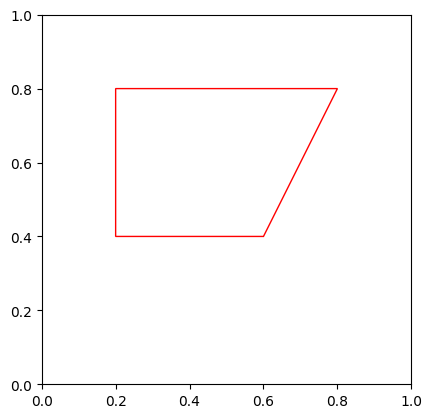

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, aspect='equal')

points = [[0.2, 0.4], [0.2, 0.8], [0.8, 0.8], [0.6, 0.4], [0.2,0.4]] #the points to trace the edges.
polygon= plt.Polygon(points,  fill=None, edgecolor='r')
ax2.add_patch(polygon)
fig2.savefig('reg-polygon.png', dpi=90, bbox_inches='tight')
plt.show() 

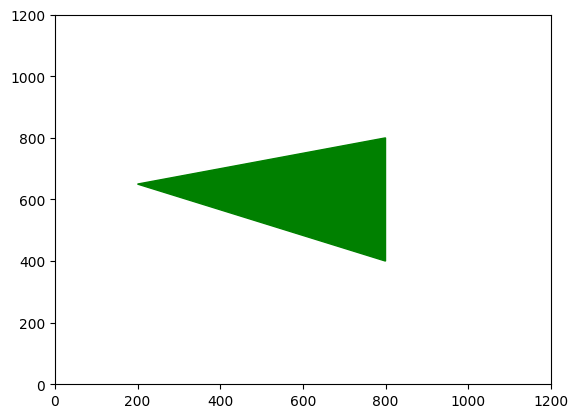

In [255]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots()

#

# # Green rectangle
# x_pos=100
# y_pos=200
# rectangle = patches.Rectangle((x_pos, y_pos), width=900, height=300, color='green')
# ax.add_patch(rectangle)

# Green trapezium
points = [[200, 550], [200, 650], [800, 800], [800, 400]] #the points to trace the edges.
polygon= plt.Polygon(points,  color='green')
ax.add_patch(polygon)

# Set axis limits
ax.set_xlim(0, 1200)
ax.set_ylim(0, 1200)

# Display the plot
plt.show()


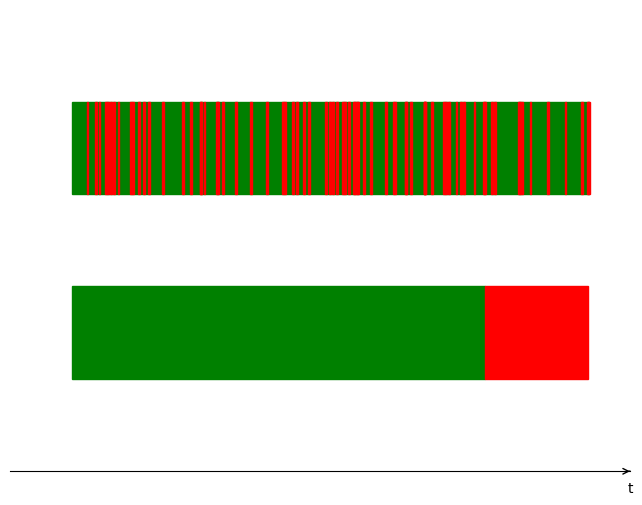

In [270]:
# PLOT 1
color_train='green'
color_test='red'

# Create a figure and axis
fig_width = 8
fig_height = 6
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
x_lims = [0, 120]
y_lims = [0, 120]
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Green rectangle 1
x_pos=x_lims[1]*0.1
y_pos=y_lims[1]*0.6
width=y_lims[1]*0.8333
height=(y_lims[1]*0.2)
gr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)
ax.add_patch(gr1)

# Green rectangle 2
x_pos=x_lims[1]*0.1
y_pos=y_lims[1]*0.2
width=y_lims[1]*0.666
height=(y_lims[1]*0.2)
gr2 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)
ax.add_patch(gr2)

# Red rectangles 1
y_pos=gr1.get_y()
height=gr1.get_height()

total_width=gr1.get_width()/4 # 80-20 split, 1:4 ratio
num_rectangles = 75
width=total_width/num_rectangles
prueba=0
for _ in range(num_rectangles):
    x_pos = random.uniform(gr1.get_x(), gr1.get_x()+gr1.get_width())  # Generate random x_position within the range of the green rectangle
    rr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
    prueba=prueba + rr_n.get_width()
    ax.add_patch(rr_n)

# Red rectangle 2
x_pos=gr2.get_x() + gr2.get_width()
y_pos=gr2.get_y()
width=gr2.get_width()/4 # 80-20 split, 1:4 ratio
height=gr2.get_height()
rr2 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(rr2)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove ticks and tick labels on both axes
ax.tick_params(bottom=False, left=False, labelleft=False)
ax.set_xticks([x_lims[1]])
ax.set_xticklabels(['t'])

# Set the linewidth of the Y axis spine to 0
ax.spines['left'].set_linewidth(0)

# Add an arrow to the X axis at the right end
ax.annotate('', xy=(1, 0), xycoords='axes fraction',
            xytext=(0.99999, 0), textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->'))

# Display the plot
plt.show()

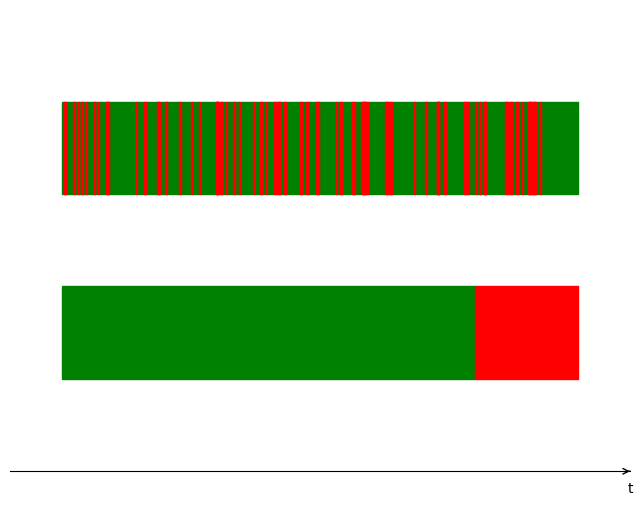

In [257]:
# PLOT 1
color_train='green'
color_test='red'

# Create a figure and axis
fig_width = 8
fig_height = 6
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
x_lims = [0, 120]
y_lims = [0, 120]
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set limits for shapes
x_lims_sh = [x_lims[0]+0.08333*x_lims[1], x_lims[0]+0.9166*x_lims[1]]
x_width_sh = x_lims_sh[1]-x_lims_sh[0]

# Green rectangle 1
x_pos=x_lims_sh[0]
y_pos=y_lims[1]*0.6
width=x_width_sh
height=(y_lims[1]*0.2)
gr1 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)
ax.add_patch(gr1)

# Green rectangle 2
x_pos=x_lims_sh[0]
y_pos=y_lims[1]*0.2
width=x_width_sh*0.8
height=(y_lims[1]*0.2)
gr2 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)
ax.add_patch(gr2)

# Red rectangles 1
y_pos=gr1.get_y()
height=gr1.get_height()

total_width=gr1.get_width()/4 # 80-20 split, 1:4 ratio
num_rectangles = 75
width=total_width/num_rectangles
prueba=0
for _ in range(num_rectangles):
    x_pos = random.uniform(gr1.get_x(), gr1.get_x()+gr1.get_width())  # Generate random x_position within the range of the green rectangle
    rr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
    prueba=prueba + rr_n.get_width()
    ax.add_patch(rr_n)

# Red rectangle 2
x_pos=gr2.get_x() + gr2.get_width()
y_pos=gr2.get_y()
width=gr2.get_width()/4 # 80-20 split, 1:4 ratio
height=gr2.get_height()
rr2 = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
ax.add_patch(rr2)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove ticks and tick labels on both axes
ax.tick_params(bottom=False, left=False, labelleft=False)
ax.set_xticks([x_lims[1]])
ax.set_xticklabels(['t'])

# Set the linewidth of the Y axis spine to 0
ax.spines['left'].set_linewidth(0)

# Add an arrow to the X axis at the right end
ax.annotate('', xy=(1, 0), xycoords='axes fraction',
            xytext=(0.99999, 0), textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->'))

# Display the plot
plt.show()

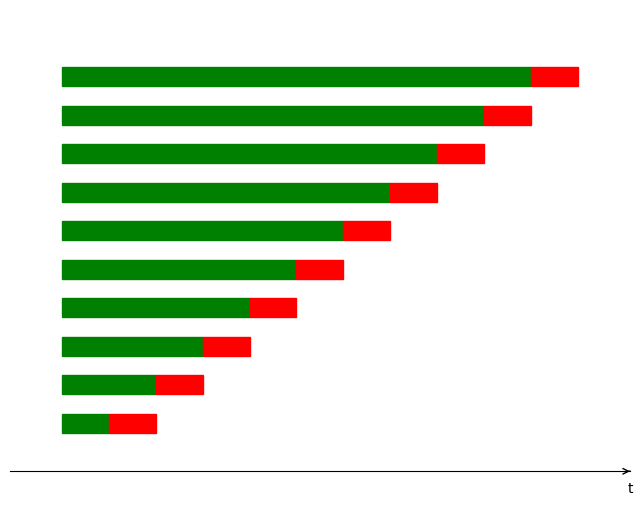

In [299]:
# PLOT 2
color_train='green'
color_test='red'

# Create a figure and axis
fig_width = 8
fig_height = 6
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
x_lims = [0, 120]
y_lims = [0, 120]
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set limits for shapes
x_lims_sh = [x_lims[0]+0.08333*x_lims[1], x_lims[0]+0.9166*x_lims[1]]
x_width_sh = x_lims_sh[1]-x_lims_sh[0]

y_lims_sh = [y_lims[0]+0.08333*y_lims[1], y_lims[0]+0.9166*y_lims[1]]
y_height_sh = y_lims_sh[1]-y_lims_sh[0]

num_partitions = 10
test_size=x_width_sh*(1/(num_partitions+1))
bar_height=y_height_sh*0.5/num_partitions

for i in range(1, num_partitions+1):

    # Train rectangle
    x_pos=x_lims_sh[0]
    y_pos=y_lims_sh[0]+bar_height*(2*i-2)
    width=test_size*i
    height=bar_height
    tr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)
    ax.add_patch(tr_n)

    # Test rectangle
    x_pos=tr_n.get_x()+tr_n.get_width()
    y_pos=tr_n.get_y()
    width=test_size
    height=bar_height
    te_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
    ax.add_patch(te_n)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove ticks and tick labels on both axes
ax.tick_params(bottom=False, left=False, labelleft=False)
ax.set_xticks([x_lims[1]])
ax.set_xticklabels(['t'])

# Set the linewidth of the Y axis spine to 0
ax.spines['left'].set_linewidth(0)

# Add an arrow to the X axis at the right end
ax.annotate('', xy=(1, 0), xycoords='axes fraction',
            xytext=(0.99999, 0), textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->'))

# Add title
plt.tile()

# Display the plot
plt.show()

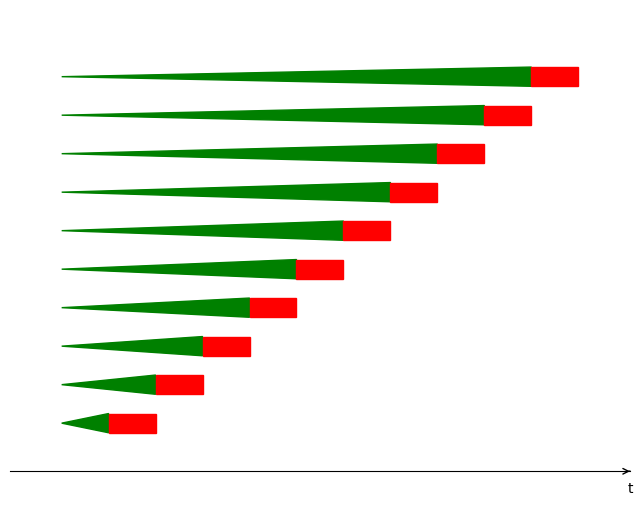

In [285]:
# PLOT 3
color_train='green'
color_test='red'

# Create a figure and axis
fig_width = 8
fig_height = 6
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
x_lims = [0, 120]
y_lims = [0, 120]
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set limits for shapes
x_lims_sh = [x_lims[0]+0.08333*x_lims[1], x_lims[0]+0.9166*x_lims[1]]
x_width_sh = x_lims_sh[1]-x_lims_sh[0]

y_lims_sh = [y_lims[0]+0.08333*y_lims[1], y_lims[0]+0.9166*y_lims[1]]
y_height_sh = y_lims_sh[1]-y_lims_sh[0]

num_partitions = 10
test_size=x_width_sh*(1/(num_partitions+1))
bar_height=y_height_sh*0.5/num_partitions

for i in range(1, num_partitions+1):

    # Train triangle
    #   Define the points based on the points of the rectangle
    x_pos=x_lims_sh[0]
    y_pos=y_lims_sh[0]+bar_height*(2*i-2)
    width=test_size*i
    height=bar_height
    tr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)

    points = [[x_pos, y_pos+bar_height*0.5], [x_pos+width, y_pos], [x_pos+width, y_pos+bar_height]] #the points to trace the edges.
    polygon= plt.Polygon(points,  color='green')
    ax.add_patch(polygon)

    # Test rectangle
    x_pos=tr_n.get_x()+tr_n.get_width()
    y_pos=tr_n.get_y()
    width=test_size
    height=bar_height
    te_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
    ax.add_patch(te_n)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove ticks and tick labels on both axes
ax.tick_params(bottom=False, left=False, labelleft=False)
ax.set_xticks([x_lims[1]])
ax.set_xticklabels(['t'])

# Set the linewidth of the Y axis spine to 0
ax.spines['left'].set_linewidth(0)

# Add an arrow to the X axis at the right end
ax.annotate('', xy=(1, 0), xycoords='axes fraction',
            xytext=(0.99999, 0), textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->'))

# Display the plot
plt.show()

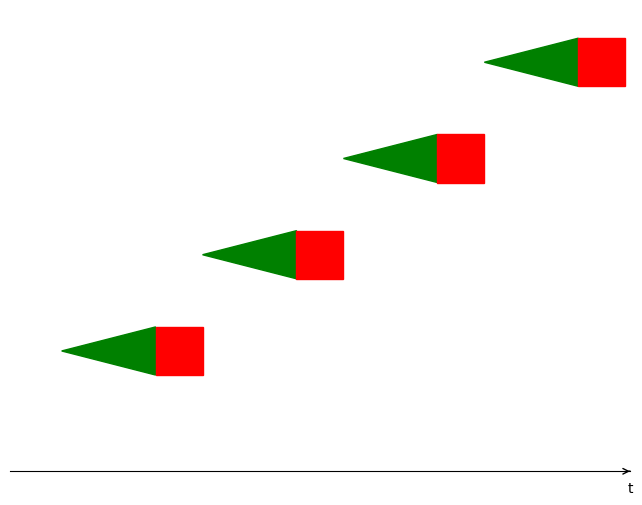

In [297]:
# PLOT 4
color_train='green'
color_test='red'

# Create a figure and axis
fig_width = 8
fig_height = 6
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set axis limits
x_lims = [0, 120]
y_lims = [0, 120]
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set limits for shapes
x_lims_sh = [x_lims[0]+0.08333*x_lims[1], x_lims[0]+0.9166*x_lims[1]]
x_width_sh = x_lims_sh[1]-x_lims_sh[0]

y_lims_sh = [y_lims[0]+0.08333*y_lims[1], y_lims[0]+0.9166*y_lims[1]]
y_lims_sh = [value * 2.5 for value in y_lims_sh]
y_height_sh = y_lims_sh[1]-y_lims_sh[0]

num_partitions = 10
test_size=x_width_sh*(1/(num_partitions+1))
bar_height=y_height_sh*0.5/num_partitions

for i in range(1, num_partitions+1):
    

    # Train triangle
    #   Define the points based on the points of the rectangle
    width=test_size*2
    height=bar_height
    x_pos=x_lims_sh[0] + (i-1)*(width+test_size)
    y_pos=y_lims_sh[0]+bar_height*(2*i-2)
    tr_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_train)

    points = [[x_pos, y_pos+bar_height*0.5], [x_pos+width, y_pos], [x_pos+width, y_pos+bar_height]] #the points to trace the edges.
    polygon= plt.Polygon(points,  color='green')
    ax.add_patch(polygon)

    # Test rectangle
    x_pos=tr_n.get_x()+tr_n.get_width()
    y_pos=tr_n.get_y()
    width=test_size
    height=bar_height
    te_n = patches.Rectangle((x_pos, y_pos), width=width, height=height, color=color_test)
    ax.add_patch(te_n)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove ticks and tick labels on both axes
ax.tick_params(bottom=False, left=False, labelleft=False)
ax.set_xticks([x_lims[1]])
ax.set_xticklabels(['t'])

# Set the linewidth of the Y axis spine to 0
ax.spines['left'].set_linewidth(0)

# Add an arrow to the X axis at the right end
ax.annotate('', xy=(1, 0), xycoords='axes fraction',
            xytext=(0.99999, 0), textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->'))

# Display the plot
plt.show()

In [294]:
2*y_lims_sh
[value * 2 for value in y_lims_sh]


[19.999200000000002, 219.98399999999998]

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_columns = 30
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import matplotlib
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit]
n_points = 100
n_splits = 5
X = np.random.randn(100, 10)
percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

for i, cv in enumerate(cvs):
    this_cv = cv(n_splits=n_splits)
    plot_cv_indices(this_cv, n_splits, X, y, date_col=None)

TypeError: plot_cv_indices() got an unexpected keyword argument 'date_col'

In [3]:


df = pd.read_csv('/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv')
df = df.loc[~df['Date'].isna()]
df['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y").dt.date
df.sort_values('Date', ignore_index = True, inplace = True)
display(df.sample())

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv'